In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None


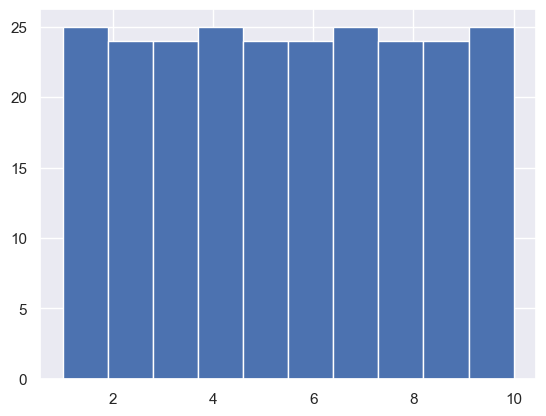

<Figure size 1000x1000 with 0 Axes>

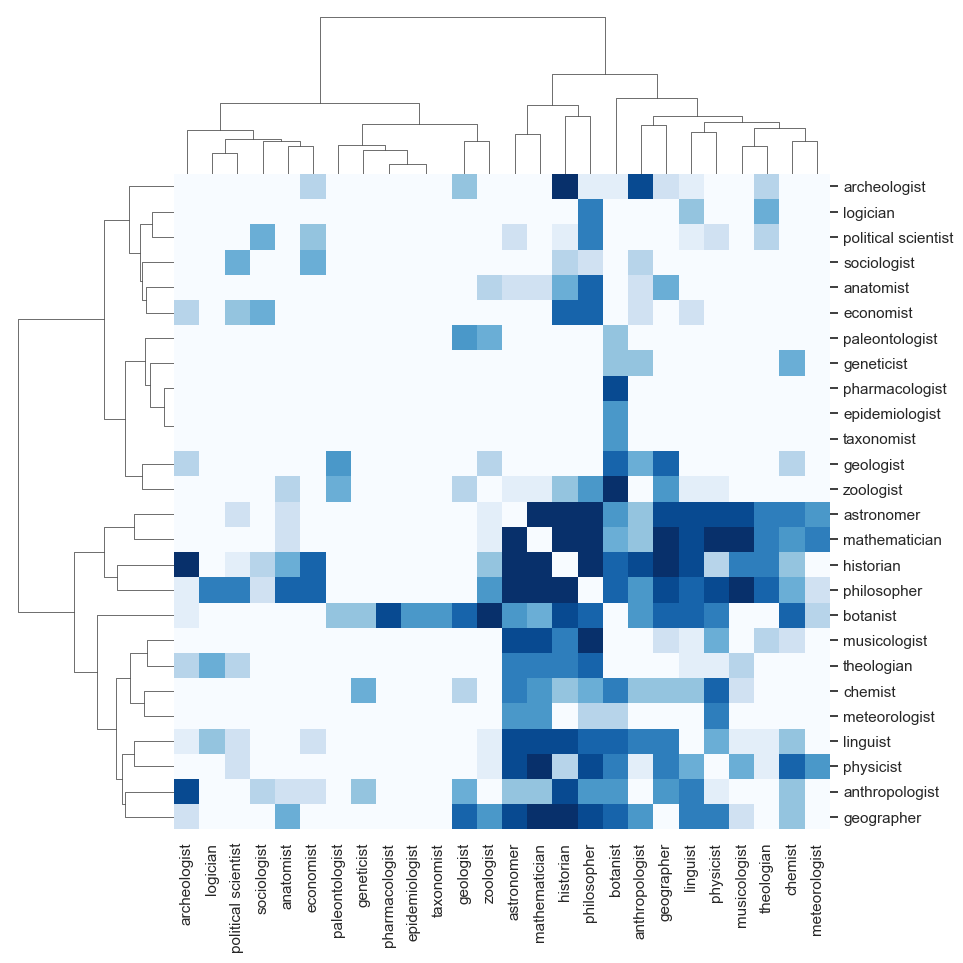

In [147]:
df = pd.read_csv('../networks/matrix/global_weighted.csv', index_col = [0])
#df = df[df['rank_count']<=3]
df = df[['source', 'target', 'specificity']]
n = 10
df['weight'] = pd.cut(df['specificity'].rank(method='first'), bins=n, labels = np.arange(1,n+1))
df['weight'] = df['weight'].astype(int)
df.weight.hist()

#df['specificity'] = pd.cut(df['specificity'].rank(method='first'), bins=n, labels = np.arange(1,n+1))
#df['specificity'] = df['specificity'].astype(int)

matrix = df.pivot(index='source', columns='target', values='weight')
matrix = matrix.fillna(0)


plt.figure(figsize=(10, 10))

clustered_heatmap = sns.clustermap(
    matrix,
    cmap='Blues',
    annot=False,
    fmt=".2f",
    cbar_kws={"orientation": "horizontal", "label": None},  # Hide the color bar (legend)
    method='ward'
)

# Print or analyze the ARI values as needed
clustered_heatmap.ax_heatmap.set_ylabel('')  # Set y-label to an empty string
clustered_heatmap.ax_heatmap.set_xlabel('')  # Set y-label to an empty string
clustered_heatmap.cax.set_visible(False)
plt.xlabel('')
plt.ylabel('')
plt.title('Normalized Weighted Jaccard Similarity')
plt.show()